In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from datetime import datetime
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from sklearn.model_selection import train_test_split

# Load Dataset

In [ ]:
#download dataset
if ~os.path.isfile('AU/Data Sets/au5_500.csv'):
  data_link="https://archive.ics.uci.edu/ml/machine-learning-databases/00197/AU.zip"
  !wget $data_link
  !unzip AU.zip

--2023-03-17 17:20:30--  https://archive.ics.uci.edu/ml/machine-learning-databases/00197/AU.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8109155 (7.7M) [application/x-httpd-php]
Saving to: ‘AU.zip’

AU.zip              100%[===================>]   7.73M  13.1MB/s    in 0.6s    

2023-03-17 17:20:31 (13.1 MB/s) - ‘AU.zip’ saved [8109155/8109155]

Archive:  AU.zip
  inflating: AU/au.DLL               
  inflating: AU/au.EXE               
  inflating: AU/au.ini               
  inflating: AU/au.ovl               
  inflating: AU/AutoUniv Reference Manual.pdf  
  inflating: AU/AutoUniv User Guide.pdf  
   creating: AU/Data Sets/
  inflating: AU/Data Sets/au1_1000.arff  
  inflating: AU/Data Sets/au2_10000.csv  
  inflating: AU/Data Sets/au3_25000.data  
  inflating: AU/Data Sets/au3_25000.names  
  inflating: AU/Data 

In [ ]:
dataset=pd.read_csv("AU/Data Sets/au5_500.csv")
dataset

att1   att2   att3   att4   att5   att6   att7   att8  att9   att10  ...  \
0     6.4    550   92.0   3.15   78.2   6040   1.53   83.7    v2   0.791  ...   
1     3.1    542   70.2   4.04   79.1   6464   1.56   94.7    v1   0.738  ...   
2     3.2    579   90.9   4.16   76.7   6395   7.27   84.4    v1   0.737  ...   
3     3.1    609   78.2   3.02   78.6   5678   8.04   88.2    v2   0.806  ...   
4     2.7    557   81.0   4.03   78.9   6508   9.00   84.5    v1   0.790  ...   
..    ...    ...    ...    ...    ...    ...    ...    ...   ...     ...  ...   
495   3.0    583   69.7   4.76   78.3   6138   1.68   89.9    v2   0.854  ...   
496   7.4    586   69.7   3.54   77.2   5894   9.01   90.9    v2   0.874  ...   
497   2.9    602   69.8   3.31   78.1   6595   1.51   84.1    v2   0.738  ...   
498   7.8    600   70.5   4.20   78.3   6803   7.13   84.2    v1   0.768  ...   
499   7.1    542   77.5   4.18   79.2   5600   8.98   83.1    v2   0.759  ...   

      att117   att118   att119  att120   att121   att122  att123   att124  \
0       0.77     4753      904    0.93      2.9       v1    27.6      294   
1       0.45     6952      905    0.91      5.2       v1    28.5      660   
2       0.45     4664      897    0.84      1.1       v1    27.7      546   
3       0.56     4762      873    0.48      1.3       v2    27.7      646   
4       0.48     4649      822    0.86      1.2       v1    47.0      642   
..       ...      ...      ...     ...      ...      ...     ...      ...   
495     0.57     4654      666    0.27      3.1       v2    43.9      660   
496     0.58     5794      899    0.90      2.4       v2    35.2      523   
497     0.83     4669      630    0.77      1.3       v1    66.4      654   
498     0.52     5602      780    0.28      3.5       v1    36.0      646   
499     0.53     5104      693    0.45      5.7       v1    46.2      336   

      att125    class  
0        739   class4  
1        705   class4  
2        688   class1  
3        783   class4  
4        665   class1  
..       ...      ...  
495      686   class1  
496      887   class4  
497      869   class1  
498      719   class1  
499      591   class4  

[500 rows x 126 columns]

In [ ]:
dataset.columns

Index(['att1', ' att2', ' att3', ' att4', ' att5', ' att6', ' att7', ' att8',
       ' att9', ' att10',
       ...
       ' att117', ' att118', ' att119', ' att120', ' att121', ' att122',
       ' att123', ' att124', ' att125', ' class'],
      dtype='object', length=126)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 126 entries, att1 to  class
dtypes: float64(54), int64(47), object(25)
memory usage: 492.3+ KB


In [ ]:
#dataset.dtypes
dataset.dtypes=='int64'

att1       False
 att2       True
 att3      False
 att4      False
 att5      False
           ...  
 att122    False
 att123    False
 att124     True
 att125     True
 class     False
Length: 126, dtype: bool

In [ ]:
categorical_columns=dataset.columns[dataset.dtypes=='object']
dataset[categorical_columns]
#categorical_columns

att9  att14  att17  att24  att25  att28  att35  att42  att43  att48  ...  \
0      v2     v2     v3     v2     v1     v1     v3     v3     v3     v2  ...   
1      v1     v3     v1     v3     v1     v2     v3     v3     v3     v1  ...   
2      v1     v2     v3     v3     v2     v2     v2     v2     v1     v1  ...   
3      v2     v3     v1     v3     v1     v2     v2     v1     v2     v1  ...   
4      v1     v3     v1     v2     v1     v2     v3     v2     v3     v1  ...   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
495    v2     v3     v3     v3     v1     v1     v2     v3     v2     v1  ...   
496    v2     v2     v3     v1     v1     v1     v2     v3     v1     v2  ...   
497    v2     v1     v3     v1     v3     v1     v2     v1     v1     v2  ...   
498    v1     v2     v1     v1     v2     v3     v3     v3     v2     v2  ...   
499    v2     v2     v3     v1     v1     v1     v3     v1     v4     v2  ...   

     att80  att85  att89  att91  att96  att101  att104  att116  att122  \
0       v4     v1     v1     v1     v1      v3      v3      v3      v1   
1       v3     v2     v1     v2     v2      v1      v1      v2      v1   
2       v2     v2     v2     v1     v2      v2      v2      v1      v1   
3       v4     v2     v1     v2     v1      v1      v2      v3      v2   
4       v3     v2     v3     v3     v2      v3      v3      v3      v1   
..     ...    ...    ...    ...    ...     ...     ...     ...     ...   
495     v2     v1     v2     v2     v1      v2      v1      v2      v2   
496     v2     v3     v3     v1     v1      v1      v2      v2      v2   
497     v1     v3     v2     v3     v2      v1      v4      v1      v1   
498     v2     v2     v1     v2     v2      v2      v2      v3      v1   
499     v1     v2     v1     v1     v1      v2      v4      v2      v1   

       class  
0     class4  
1     class4  
2     class1  
3     class4  
4     class1  
..       ...  
495   class1  
496   class4  
497   class1  
498   class1  
499   class4  

[500 rows x 25 columns]

In [ ]:
dataset[' att9'].value_counts().sort_index()

 v1    260
 v2    240
Name:  att9, dtype: int64

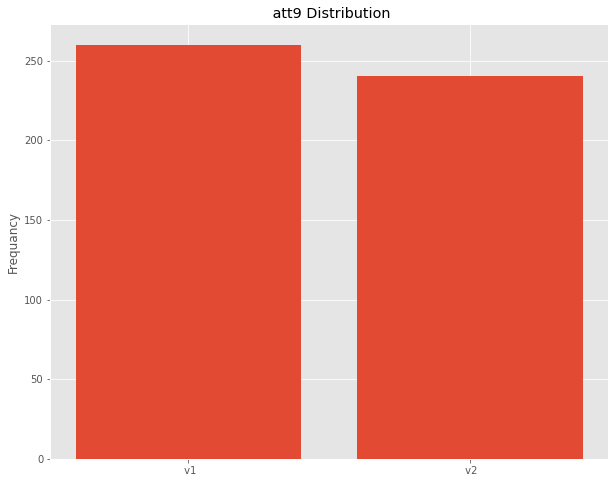

In [ ]:
def Distribution_plot(dataset,col_name):
    fig = plt.figure(figsize =(10,8 ))
    ss=dataset[col_name].value_counts().sort_index()
    plt.bar(list(ss.keys()),list(ss.values))
    plt.title(f'{col_name} Distribution')
    plt.ylabel('Frequancy')
    plt.show()

col_name=' att9'
Distribution_plot(dataset,col_name)

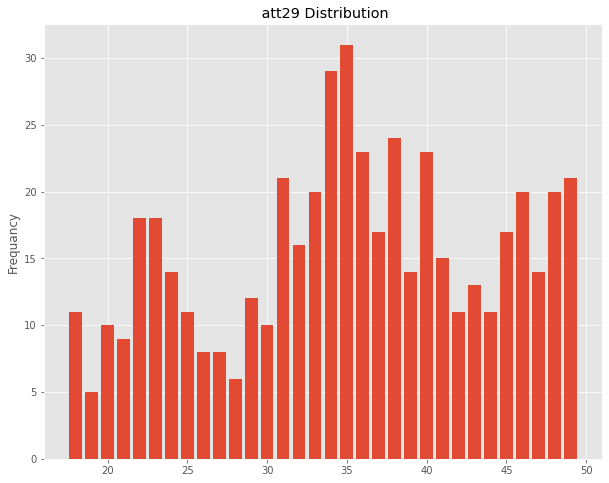

In [ ]:
col_name=' att29'
Distribution_plot(dataset,col_name)

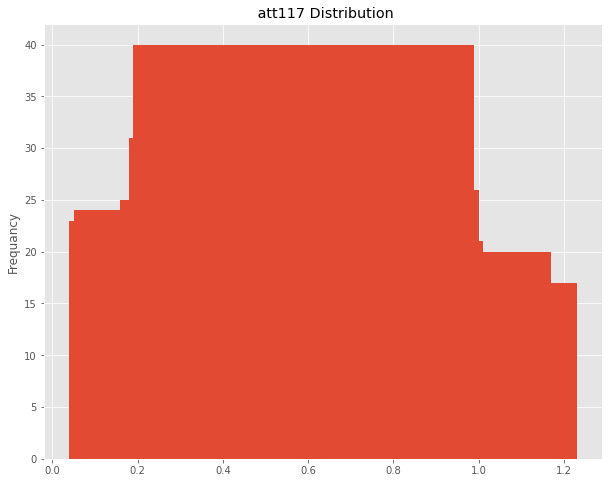

In [ ]:
col_name=' att117'
Distribution_plot(dataset,col_name)

<Figure size 720x576 with 0 Axes>

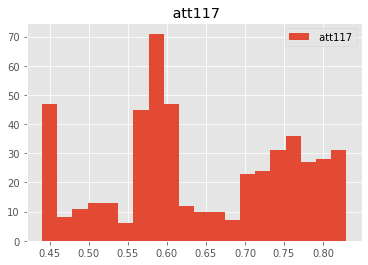

In [ ]:
col_name=' att117'
fig = plt.figure(figsize =(10,8 ))
dataset.hist(col_name,bins=20)
plt.legend(labels=[col_name])
plt.show()

# Numerical Attributes

#### variance and mean 

In [ ]:
mean= lambda X : sum(X)/len(X)
X=[1,2,3,4,5,6,7,8,9,10]
[(x-mean(X))**2 for x in X]
[x**2 for x in X]
(mean([x**2 for x in X])-mean(X)**2)**0.5


2.8722813232690143

In [ ]:
mean= lambda X : sum(X)/len(X)
#var= lambda X: sum([x**2 for x in X])/len(X) -mean(X)**2
var= lambda X: sum([(x-mean(X))**2 for x in X])/(len(X)-1)
#var= lambda X: (sum([x**2 for x in X])-len(X)*mean(X)**2)/(len(X)-1)
def summery (X):
    res={'count':len(X),
         'mean':mean(X),
         'std':var(X)**0.5,
         'min': min(X),
         'max':max(X)}
    return res
    
test_data=[1,2,3,4,5,6,7,8,9,10]
summery(test_data)

{'count': 10, 'mean': 5.5, 'std': 3.0276503540974917, 'min': 1, 'max': 10}

In [ ]:
numerical_columns=dataset.columns[~(dataset.dtypes=='object')]
num_dataset=dataset[numerical_columns]
SUMMERY=dict()
for col in numerical_columns:
    SUMMERY.update({col:summery(num_dataset[col])})
SUMMERY=pd.DataFrame(SUMMERY)
SUMMERY

att1        att2        att3        att4        att5  \
count  500.000000  500.000000  500.000000  500.000000  500.000000   
mean     3.741600  575.344000   78.374400    3.682560   77.987000   
std      1.399968   25.152395    8.238756    0.604264    0.819631   
min      2.600000  539.000000   69.600000    2.750000   76.500000   
max      7.800000  624.000000   92.300000    4.760000   79.500000   

              att6        att7        att8       att10      att11  ...  \
count   500.000000  500.000000  500.000000  500.000000  500.00000  ...   
mean   6812.124000    6.310040   88.490600    0.777790    1.25890  ...   
std    1010.129897    2.905399    4.590241    0.040108    0.30057  ...   
min    5362.000000    1.100000   82.700000    0.737000    0.23000  ...   
max    9087.000000    9.040000   94.700000    0.881000    1.79000  ...   

           att114      att115      att117       att118      att119  \
count  500.000000  500.000000  500.000000   500.000000  500.000000   
mean     4.660560   67.158000    0.642340  6003.856000  780.992000   
std      0.174385   21.840675    0.117449  1247.845089  102.328638   
min      4.350000   18.000000    0.440000  4642.000000  608.000000   
max      4.980000   93.000000    0.830000  8128.000000  908.000000   

           att120      att121     att123      att124      att125  
count  500.000000  500.000000  500.00000  500.000000  500.000000  
mean     0.659160    3.534200   45.46120  576.802000  705.180000  
std      0.221908    1.672784   14.90162  136.548709   93.465798  
min      0.270000    0.800000   25.50000  220.000000  588.000000  
max      0.930000    5.700000   72.10000  715.000000  922.000000  

[5 rows x 101 columns]

In [ ]:
dataset.describe()

att1        att2        att3        att4        att5  \
count  500.000000  500.000000  500.000000  500.000000  500.000000   
mean     3.741600  575.344000   78.374400    3.682560   77.987000   
std      1.399968   25.152395    8.238756    0.604264    0.819631   
min      2.600000  539.000000   69.600000    2.750000   76.500000   
25%      2.800000  553.000000   70.800000    3.030000   77.300000   
50%      3.100000  572.000000   75.900000    4.030000   78.100000   
75%      4.325000  597.000000   86.875000    4.150000   78.625000   
max      7.800000  624.000000   92.300000    4.760000   79.500000   

              att6        att7        att8       att10      att11  ...  \
count   500.000000  500.000000  500.000000  500.000000  500.00000  ...   
mean   6812.124000    6.310040   88.490600    0.777790    1.25890  ...   
std    1010.129897    2.905399    4.590241    0.040108    0.30057  ...   
min    5362.000000    1.100000   82.700000    0.737000    0.23000  ...   
25%    5995.750000    3.955000   83.800000    0.743000    1.19000  ...   
50%    6740.000000    7.540000   88.200000    0.764500    1.28000  ...   
75%    7307.000000    8.822500   93.700000    0.798250    1.43000  ...   
max    9087.000000    9.040000   94.700000    0.881000    1.79000  ...   

           att114      att115      att117       att118      att119  \
count  500.000000  500.000000  500.000000   500.000000  500.000000   
mean     4.660560   67.158000    0.642340  6003.856000  780.992000   
std      0.174385   21.840675    0.117449  1247.845089  102.328638   
min      4.350000   18.000000    0.440000  4642.000000  608.000000   
25%      4.550000   50.000000    0.570000  4774.500000  694.500000   
50%      4.620000   75.000000    0.610000  5720.000000  808.000000   
75%      4.860000   85.000000    0.750000  7152.000000  871.250000   
max      4.980000   93.000000    0.830000  8128.000000  908.000000   

           att120      att121     att123      att124      att125  
count  500.000000  500.000000  500.00000  500.000000  500.000000  
mean     0.659160    3.534200   45.46120  576.802000  705.180000  
std      0.221908    1.672784   14.90162  136.548709   93.465798  
min      0.270000    0.800000   25.50000  220.000000  588.000000  
25%      0.507500    1.900000   28.67500  485.250000  613.000000  
50%      0.630000    3.500000   45.50000  645.000000  703.500000  
75%      0.900000    5.300000   61.12500  680.000000  771.000000  
max      0.930000    5.700000   72.10000  715.000000  922.000000  

[8 rows x 101 columns]

#### Covariance and Correlation

$cov(x,y)=E[XY]-E[X]E[Y]$

$cor(x,y)={cov(x,y)}/{S_x*S_y} $

$cor(x,y)={cov(x,y)}/{\sigma_x*\sigma_y} $

In [ ]:
X = [1,2,3,4,5,6,7,8,9,10]
Y = [5,6,9,11,12,15,17,18,21,23]
[x*y for x,y in zip(X,Y)]

[5, 12, 27, 44, 60, 90, 119, 144, 189, 230]

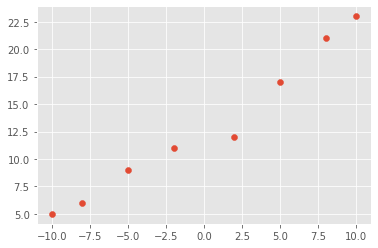

Covariance =42.75,Correlation=0.86


In [ ]:
cov=lambda X,Y : mean([x*y for x,y in zip(X,Y)]) -mean(X)*mean(Y)
corr=lambda X,Y : cov(X,Y)/(var(X)*var(Y))**0.5
X = [-10,-8,-5,-2,2,5,8,10]
Y =  [5,6,9,11,12,17,21,23] #[x**2 for x in X]#
#plot the variables to show linearity
plt.scatter(X,Y)
#plt.scatter(X,list(reversed(Y)))
plt.show()
print(f"Covariance ={round(cov(X,Y),3)},Correlation={round(corr(X,Y),3)}")
#print(f"Covariance ={round(cov(X,list(reversed(Y))),3)},Correlation={round(corr(X,list(reversed(Y))),3)}")

$cov(x,y)=E[(X-\mu_X)(Y-\mu_Y)]$

$COV=\frac{(D-\mu)^T(D-\mu)}{m}$

In [ ]:
D=np.array([X,Y]).T
D_centerd= D-D.mean(axis=0)
m=D.shape[0]
cov_mat=(1/m)*D_centerd.T @ D_centerd
print('cov_mat:\n',cov_mat)

cov_mat:
 [[48.25 42.75]
 [42.75 39.25]]


In [ ]:
dataset.cov().style

In [ ]:
dataset.corr("spearman").style.background_gradient(cmap='coolwarm')

In [ ]:
X_centerd=num_dataset-num_dataset.mean()
X_centerd.describe()

att1          att2          att3          att4          att5  \
count  5.000000e+02  5.000000e+02  5.000000e+02  5.000000e+02  5.000000e+02   
mean  -4.654055e-16 -5.093170e-14  5.485390e-15 -6.217249e-17  4.860112e-15   
std    1.399968e+00  2.515239e+01  8.238756e+00  6.042643e-01  8.196308e-01   
min   -1.141600e+00 -3.634400e+01 -8.774400e+00 -9.325600e-01 -1.487000e+00   
25%   -9.416000e-01 -2.234400e+01 -7.574400e+00 -6.525600e-01 -6.870000e-01   
50%   -6.416000e-01 -3.344000e+00 -2.474400e+00  3.474400e-01  1.130000e-01   
75%    5.834000e-01  2.165600e+01  8.500600e+00  4.674400e-01  6.380000e-01   
max    4.058400e+00  4.865600e+01  1.392560e+01  1.077440e+00  1.513000e+00   

               att6          att7          att8         att10         att11  \
count  5.000000e+02  5.000000e+02  5.000000e+02  5.000000e+02  5.000000e+02   
mean   2.037268e-13  9.166001e-16 -4.831691e-16  2.153833e-17  3.108624e-16   
std    1.010130e+03  2.905399e+00  4.590241e+00  4.010774e-02  3.005702e-01   
min   -1.450124e+03 -5.210040e+00 -5.790600e+00 -4.079000e-02 -1.028900e+00   
25%   -8.163740e+02 -2.355040e+00 -4.690600e+00 -3.479000e-02 -6.890000e-02   
50%   -7.212400e+01  1.229960e+00 -2.906000e-01 -1.329000e-02  2.110000e-02   
75%    4.948760e+02  2.512460e+00  5.209400e+00  2.046000e-02  1.711000e-01   
max    2.274876e+03  2.729960e+00  6.209400e+00  1.032100e-01  5.311000e-01   

       ...        att114        att115        att117        att118  \
count  ...  5.000000e+02  5.000000e+02  5.000000e+02  5.000000e+02   
mean   ...  6.146195e-16 -1.534772e-15 -2.575717e-17  2.328306e-13   
std    ...  1.743849e-01  2.184067e+01  1.174492e-01  1.247845e+03   
min    ... -3.105600e-01 -4.915800e+01 -2.023400e-01 -1.361856e+03   
25%    ... -1.105600e-01 -1.715800e+01 -7.234000e-02 -1.229356e+03   
50%    ... -4.056000e-02  7.842000e+00 -3.234000e-02 -2.838560e+02   
75%    ...  1.994400e-01  1.784200e+01  1.076600e-01  1.148144e+03   
max    ...  3.194400e-01  2.584200e+01  1.876600e-01  2.124144e+03   

             att119        att120        att121        att123        att124  \
count  5.000000e+02  5.000000e+02  5.000000e+02  5.000000e+02  5.000000e+02   
mean   3.819878e-14  4.174439e-17  2.415845e-16  1.975309e-15 -2.273737e-14   
std    1.023286e+02  2.219085e-01  1.672784e+00  1.490162e+01  1.365487e+02   
min   -1.729920e+02 -3.891600e-01 -2.734200e+00 -1.996120e+01 -3.568020e+02   
25%   -8.649200e+01 -1.516600e-01 -1.634200e+00 -1.678620e+01 -9.155200e+01   
50%    2.700800e+01 -2.916000e-02 -3.420000e-02  3.880000e-02  6.819800e+01   
75%    9.025800e+01  2.408400e-01  1.765800e+00  1.566380e+01  1.031980e+02   
max    1.270080e+02  2.708400e-01  2.165800e+00  2.663880e+01  1.381980e+02   

             att125  
count  5.000000e+02  
mean   5.002221e-14  
std    9.346580e+01  
min   -1.171800e+02  
25%   -9.218000e+01  
50%   -1.680000e+00  
75%    6.582000e+01  
max    2.168200e+02  

[8 rows x 101 columns]

In [ ]:
cov_mat=(1.0/len(X_centerd))*X_centerd.T@X_centerd
cov_mat.style

$Z_x=\frac{(X-\mu_x)}{\sigma_x}$

$corr(x,y)=E[Z_xZ_y]$

In [ ]:
X_normed=num_dataset-num_dataset.mean()
X_normed=X_normed/X_normed.std(axis=0,ddof=0)
#for col in numerical_columns:
#    X_normed[col]=X_normed[col]/X_normed[col].std(ddof=0)
corr_mat=(1.0/len(X_normed))*X_normed.T@X_normed
corr_mat.style.background_gradient(cmap='coolwarm')

### Data normalization

In [ ]:
def min_max(X,a=0,b=1):
  m1,m2 = X.min(),X.max()
  return (b-a)*(X-m1)/(m2-m1)+a
X=np.array([1,2,3,4,5,6,7,8,9,10,11])
min_max(X)
min_max(X,-1,1)

array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ])

In [ ]:
def z_score(X):
  mu,std = X.mean(),X.std(ddof=1)
  return (X-mu)/std
X=np.array([1,2,3,4,5,6,7,8,9,10])
z_score(X)

array([-1.48630108, -1.15601195, -0.82572282, -0.49543369, -0.16514456,
        0.16514456,  0.49543369,  0.82572282,  1.15601195,  1.48630108])

### Convert numerical attrebiuts to categorical (discretization)

histogram (equal width):

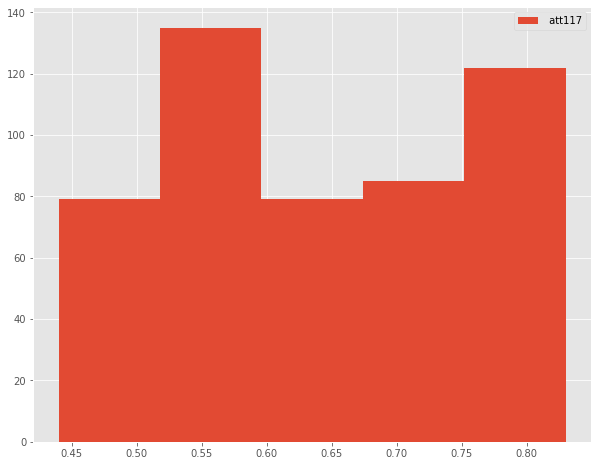

[0.44  0.518 0.596 0.674 0.752 0.83 ]
bin1:(0.44 to 0.518):79 
 bin2:(0.518 to 0.596):135 
 bin3:(0.596 to 0.674):79 
 bin4:(0.674 to 0.752):85 
 bin5:(0.752 to 0.83):122 



In [ ]:
col_name=' att117'
n_bins=5
fig = plt.figure(figsize =(10,8 ))
#dataset.hist(col_name,bins=n_bins)
frq,bins,patches=plt.hist(dataset[col_name],bins=n_bins)
plt.legend(labels=[col_name])
plt.show()
print(bins)
print(*[f'bin{i+1}:({round(a,3)} to {round(b,3)}):{int(k)} \n' for i,a,b,k in zip(np.arange(n_bins),bins[:-1],bins[1:],frq)])

for more about Data bining ---> [link](https://www.geeksforgeeks.org/ml-binning-or-discretization/)

quantile and percentile (equal depth)

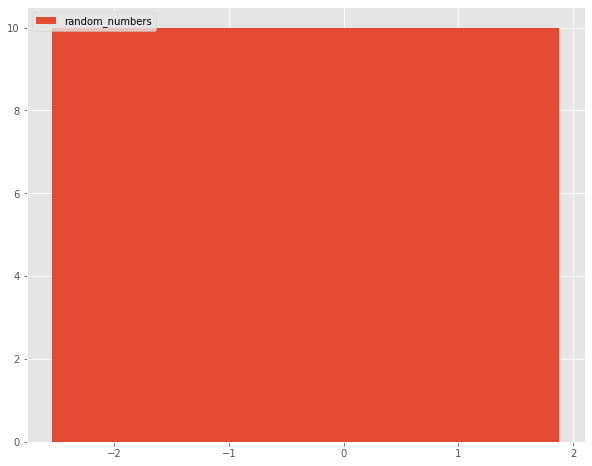

bin1:(-2.54 to -1.171):10.0 
 bin2:(-1.171 to -0.861):10.0 
 bin3:(-0.861 to -0.63):10.0 
 bin4:(-0.63 to -0.249):10.0 
 bin5:(-0.249 to -0.069):10.0 
 bin6:(-0.069 to 0.167):10.0 
 bin7:(0.167 to 0.603):10.0 
 bin8:(0.603 to 1.041):10.0 
 bin9:(1.041 to 1.478):10.0 
 bin10:(1.478 to 1.88):10.0 



In [ ]:
def histedges(X, n_bins):
    npt = len(X)
    return np.interp(np.linspace(0, npt, n_bins + 1),
                     np.arange(npt),
                     np.sort(X))

col_name=' att117'
col_name='random_numbers'
n_bins=10
x = np.random.randn(100)#dataset[col_name]
equal_depth_bins=histedges(x, n_bins)
#print(equal_depth_bins)
fig = plt.figure(figsize =(10,8 ))
frq,bins,patches=plt.hist(x,bins=equal_depth_bins)
plt.legend(labels=[col_name])
plt.show()
#print(bins)
print(*[f'bin{i+1}:({round(a,3)} to {round(b,3)}):{round(k,3)} \n' for i,a,b,k in zip(np.arange(n_bins),bins[:-1],bins[1:],frq)])

In [ ]:
bins

array([-2.54018732, -1.17123703, -0.86054372, -0.63023573, -0.24926729,
       -0.0689907 ,  0.16694775,  0.60336302,  1.04128631,  1.47835749,
        1.8801906 ])

#### Quantiles, Median and IQR

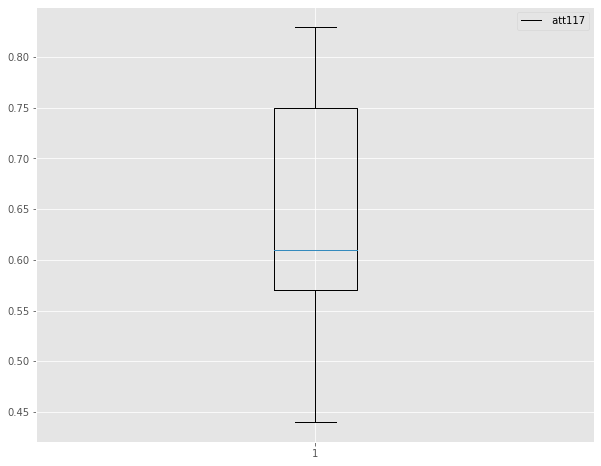

Q_1=0.57, Median=0.61, Q_3=0.75, IQR=0.18, upper_boand=0.83, lower_boand=0.44


In [ ]:
col_name=' att117'
n_bins=5
fig = plt.figure(figsize =(10,8 ))
#dataset.hist(col_name,bins=n_bins)
plt.boxplot(dataset[col_name])
plt.legend(labels=[col_name])
plt.show()
data=dataset[col_name]
median=data.median()
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
up=min(median+1.5*IQR,data.max())
down=max(median-1.5*IQR,data.min())
print(f'Q_1={round(Q1,3)}, Median={round(median,3)}, Q_3={round(Q3,3)}, IQR={round(IQR,3)}, upper_boand={round(up,3)}, lower_boand={round(down,3)}')

# Categorical Attributes

### Counting

In [ ]:
categorical_columns=dataset.columns[dataset.dtypes=='object']
categorical_dataset=dataset[categorical_columns]

In [ ]:
categorical_dataset.style

In [ ]:
categorical_dataset.describe().style

In [ ]:
col_name=' att35'
smmry_cat=dict()
for col_name in categorical_columns:
  ss=dataset[col_name].value_counts().sort_index()
  unique=len(ss)
  freq=ss.sort_values(ascending=False).values[0]
  top=ss.sort_values(ascending=False).index[0]
  smmry_cat.update({col_name:{'count':len(dataset[col_name]),'unique':unique,'freq':freq,'top':top}})
smmry_cat=pd.DataFrame(smmry_cat)
smmry_cat

att9  att14  att17  att24  att25  att28  att35  att42  att43  att48  \
count    500    500    500    500    500    500    500    500    500    500   
unique     2      3      3      3      3      3      3      3      4      2   
freq     260    173    187    184    169    189    188    169    151    251   
top       v1     v2     v3     v2     v3     v3     v2     v3     v2     v1   

        ...  att80  att85  att89  att91  att96  att101  att104  att116  \
count   ...    500    500    500    500    500     500     500     500   
unique  ...      4      3      3      3      2       3       4       3   
freq    ...    152    190    176    194    278     176     136     187   
top     ...     v1     v2     v2     v1     v2      v3      v3      v3   

        att122    class  
count      500      500  
unique       2        4  
freq       253      282  
top         v2   class1  

[4 rows x 25 columns]

In [ ]:
categorical_dataset[' att35'].value_counts()

 v2    188
 v1    162
 v3    150
Name:  att35, dtype: int64

### Convert categorical variables to numericals

In [ ]:
#method1: Map ordinal values to numbers
categorical_dataset[' att35'].astype('category').cat.codes
#categorical_dataset[' att14'].astype('category').cat.codes

0      2
1      2
2      1
3      1
4      2
      ..
495    1
496    1
497    1
498    2
499    2
Length: 500, dtype: int8

In [ ]:
categorical_dataset[categorical_dataset[' att28']==' v1'][' att28']

0       v1
8       v1
9       v1
11      v1
13      v1
      ... 
494     v1
495     v1
496     v1
497     v1
499     v1
Name:  att28, Length: 169, dtype: object

In [ ]:
#metod2: One-hot encoding (or dummies encoding)
pd.get_dummies(categorical_dataset[' att35'])

v1   v2   v3
0      0    0    1
1      0    0    1
2      0    1    0
3      0    1    0
4      0    0    1
..   ...  ...  ...
495    0    1    0
496    0    1    0
497    0    1    0
498    0    0    1
499    0    0    1

[500 rows x 3 columns]

In [ ]:
for col in categorical_columns:
  col_values=sorted(list(set(categorical_dataset[col].values)))
  print(col,col_values)
  if len(col_values)>2:
    ss=pd.get_dummies(categorical_dataset[col])
    for col_va in col_values:
      new_col=col+col_va
      categorical_dataset[new_col]=ss[col_va]
    categorical_dataset.drop(col,axis=1,inplace=True)
  if  len(col_values)==2:
    categorical_dataset[col]=categorical_dataset[col].astype('category').cat.codes

 att9 [' v1', ' v2']
 att14 [' v1', ' v2', ' v3']
 att17 [' v1', ' v2', ' v3']
 att24 [' v1', ' v2', ' v3']
 att25 [' v1', ' v2', ' v3']
 att28 [' v1', ' v2', ' v3']
 att35 [' v1', ' v2', ' v3']
 att42 [' v1', ' v2', ' v3']
 att43 [' v1', ' v2', ' v3', ' v4']
 att48 [' v1', ' v2']
 att57 [' v1', ' v2', ' v3', ' v4']
 att58 [' v1', ' v2', ' v3', ' v4']
 att62 [' v1', ' v2']
 att65 [' v1', ' v2', ' v3']
 att78 [' v1', ' v2', ' v3']
 att80 [' v1', ' v2', ' v3', ' v4']
 att85 [' v1', ' v2', ' v3']
 att89 [' v1', ' v2', ' v3']
 att91 [' v1', ' v2', ' v3']
 att96 [' v1', ' v2']
 att101 [' v1', ' v2', ' v3']
 att104 [' v1', ' v2', ' v3', ' v4']
 att116 [' v1', ' v2', ' v3']
 att122 [' v1', ' v2']
 class [' class1', ' class2', ' class3', ' class4']


<ipython-input-39-86ac565030b2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_dataset[col]=categorical_dataset[col].astype('category').cat.codes
<ipython-input-39-86ac565030b2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_dataset[new_col]=ss[col_va]
<ipython-input-39-86ac565030b2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

In [ ]:
categorical_dataset

att9   att48   att62   att96   att122   att14 v1   att14 v2   att14 v3  \
0        1       1       0       0        0          0          1          0   
1        0       0       0       1        0          0          0          1   
2        0       0       0       1        0          0          1          0   
3        1       0       1       0        1          0          0          1   
4        0       0       0       1        0          0          0          1   
..     ...     ...     ...     ...      ...        ...        ...        ...   
495      1       0       1       0        1          0          0          1   
496      1       1       0       0        1          0          1          0   
497      1       1       1       1        0          1          0          0   
498      0       1       0       1        0          0          1          0   
499      1       1       0       0        0          0          1          0   

      att17 v1   att17 v2  ...   att104 v2   att104 v3   att104 v4  \
0            0          0  ...           0           1           0   
1            1          0  ...           0           0           0   
2            0          0  ...           1           0           0   
3            1          0  ...           1           0           0   
4            1          0  ...           0           1           0   
..         ...        ...  ...         ...         ...         ...   
495          0          0  ...           0           0           0   
496          0          0  ...           1           0           0   
497          0          0  ...           0           0           1   
498          1          0  ...           1           0           0   
499          0          0  ...           0           0           1   

      att116 v1   att116 v2   att116 v3   class class1   class class2  \
0             0           0           1              0              0   
1             0           1           0              0              0   
2             1           0           0              1              0   
3             0           0           1              0              0   
4             0           0           1              1              0   
..          ...         ...         ...            ...            ...   
495           0           1           0              1              0   
496           0           1           0              0              0   
497           1           0           0              1              0   
498           0           0           1              1              0   
499           0           1           0              0              0   

      class class3   class class4  
0                0              1  
1                0              1  
2                0              0  
3                0              1  
4                0              0  
..             ...            ...  
495              0              0  
496              0              1  
497              0              0  
498              0              0  
499              0              1  

[500 rows x 71 columns]

In [ ]:
categorical_columns=dataset.columns[dataset.dtypes=='object']
categorical_dataset=dataset[categorical_columns]

In [ ]:
#metod3: frequently 
#one column
col_name=' att14'
frq_set=categorical_dataset[col_name].value_counts().sort_index()
frq_set

 v1    164
 v2    173
 v3    163
Name:  att14, dtype: int64

In [ ]:
col_name1=' att14'
col_name2=' att104'
val1=' v1'
val1=' v2'
cnd1=categorical_dataset[col_name1]==val1
cnd2=categorical_dataset[col_name2]==val2
len(categorical_dataset[cnd1 & cnd2])

38

In [ ]:
#Tow column
col_name1=' att14'
col_name2=' att104'
frq_table=dict()
for val1 in sorted(list(set(categorical_dataset[col_name2]))):
    frq_table.update({val1:dict()})
    for val2 in sorted(list(set(categorical_dataset[col_name1]))):
        cnd1=categorical_dataset[col_name1]==val2
        cnd2=categorical_dataset[col_name2]==val1
        frq_table[val1].update({val2:len(categorical_dataset[cnd1 & cnd2])}) #ToDo change '?' with cuont(val1 in col1,val2 in col 2)
frq_table=pd.DataFrame(frq_table)
frq_table

v1   v2   v3   v4
 v1   44   32   48   40
 v2   44   51   38   40
 v3   35   37   50   41

In [ ]:
#ToDo
#expected values?
#ChiSquare?
#scipy.stats.chisquare(f_obs, f_exp=None, dof )

In [ ]:
C1=categorical_dataset[col_name2]
A=C1.value_counts().sort_index().to_frame().values
A

array([[123],
       [120],
       [136],
       [121]])

In [ ]:
C2=categorical_dataset[col_name1]
B=C2.value_counts().sort_index().to_frame().values
B

array([[164],
       [173],
       [163]])

In [ ]:
def expectations (C1,C2):
  A=C1.value_counts().sort_index().to_frame().values
  B=C2.value_counts().sort_index().to_frame().values.T
  N=len(C1)
  print(A,B)
  return (1.0/N)*(A@B)

f_exp=expectations(categorical_dataset[col_name1],categorical_dataset[col_name2])

[[164]
 [173]
 [163]] [[123 120 136 121]]


In [ ]:
import scipy
scipy.stats.chisquare(frq_table, f_exp )

Power_divergenceResult(statistic=array([1.0283208 , 3.65565636, 2.72435518, 0.1468426 ]), pvalue=array([0.59800247, 0.16076234, 0.25610248, 0.92920927]))

In [ ]:
def ChiSquare(O,E=None,ddof=1):
  dof=(O.shape[0]-ddof)*(O.shape[1]-ddof)
  #if E==None:
  #  A=O.to_frame().values
  #B=C2.value_counts().sort_index().to_frame().values.T
  #N=len(C1)
  #print(A,B)
  ChiSq=(((O-E)**2/E).sum().sum())/dof
  return ChiSq
ChiSquare(frq_table.values, f_exp,ddof=1)

1.2591958244199963